# Create projections with PCA and UMAP

## Imports

In [1]:
from pathlib import Path

import pandas as pd

from utils import analysis_utils as au

/home/camo/anaconda3/envs/nf1_analysis/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


## Find the root directory of the repo regardless of repo location on system

In [2]:
# Get the current working directory
cwd = Path.cwd()

if (cwd / ".git").is_dir():
    root_dir = cwd

else:
    root_dir = None
    for parent in cwd.parents:
        if (parent / ".git").is_dir():
            root_dir = parent
            break

# Check if a Git root directory was found
if root_dir is None:
    raise FileNotFoundError("No Git root directory found.")

## Specify data paths

In [3]:
plates = {}
fs_data_path = (
    f"{root_dir}/nf1_painting_repo/3.processing_features/data/feature_selected_data"
)

plates["1"] = {"path": Path(fs_data_path) / "Plate_1_sc_norm_fs.parquet"}
plates["2"] = {"path": Path(fs_data_path) / "Plate_2_sc_norm_fs.parquet"}

out_path = Path("figures")

if not out_path.exists():
    out_path.mkdir(parents=True, exist_ok=True)

## Filter data

In [4]:
# Remove metadata columns and create a label column for each plate
for plate, vals in plates.items():
    # Read the parquet
    platedf = pd.read_parquet(vals["path"])

    # Remove Metadata
    feat_col = [
        col
        for col in platedf.columns
        if "Metadata" not in col or "Metadata_genotype" in col
    ]

    platedf = platedf[feat_col]

    # Create a label column
    platedf["labels"] = platedf["Metadata_genotype"] + plate
    platedf.drop(["Metadata_genotype"], axis=1, inplace=True)

    # Assign the dataframe to a dictionary
    plates[plate]["df"] = platedf

## Combining Data

In [5]:
plate1df = plates["1"]["df"]
plate2df = plates["2"]["df"]

In [6]:
### Use only the common columns between both plates:
common_columns = list(plate1df.columns.intersection(plate2df.columns))
plate1df = plate1df.loc[:, common_columns]
plate2df = plate2df.loc[:, common_columns]

# Combine the plates data
platescomb = pd.concat([plate1df, plate2df], axis=0)

## Filtering data

In [7]:
# Create a dataframe with WT data
plateswt = platescomb.loc[~platescomb["labels"].str.contains("Null")]

# Create a dataframe with Null data
platesnull = platescomb.loc[~platescomb["labels"].str.contains("WT")]

## Visualization

Explained variance in PC1 and PC2 = 0.2162738416220645


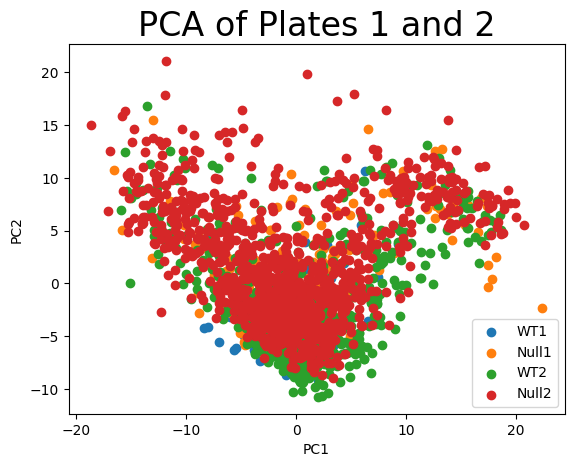

In [8]:
save_args = {"fname": out_path / "pca_plates_1_2"}
au.plot_pca(
    feats=platescomb.drop("labels", axis=1),
    labels=platescomb["labels"],
    save_args=save_args,
    title="PCA of Plates 1 and 2",
)

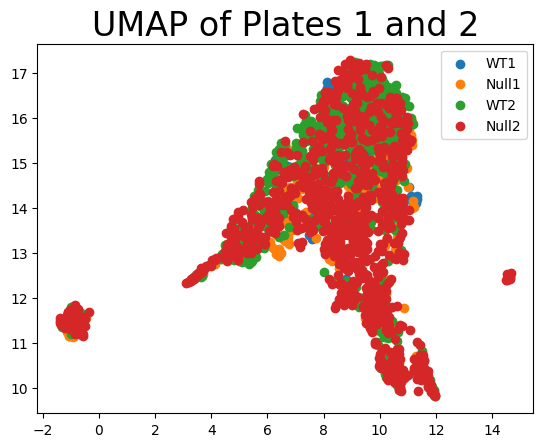

In [9]:
save_args = {"fname": out_path / "umap_plates_1_2"}
au.plot_umap(
    feats=platescomb.drop("labels", axis=1),
    labels=platescomb["labels"],
    save_args=save_args,
    loc="upper right",
    title="UMAP of Plates 1 and 2",
)

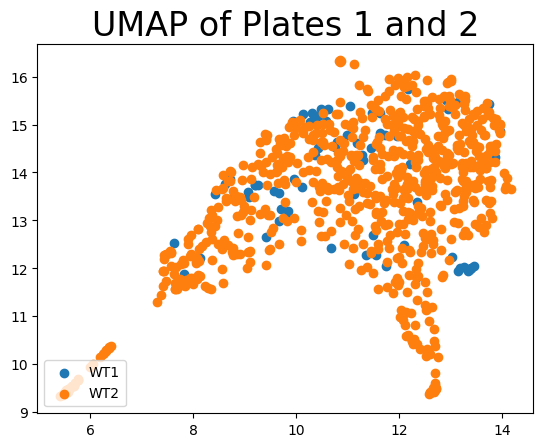

In [10]:
save_args = {"fname": out_path / "umap_wt_plates_1_2"}
au.plot_umap(
    feats=plateswt.drop("labels", axis=1),
    labels=plateswt["labels"],
    save_args=save_args,
    loc="lower left",
    title="UMAP of Plates 1 and 2",
)

Explained variance in PC1 and PC2 = 0.19870857582465173


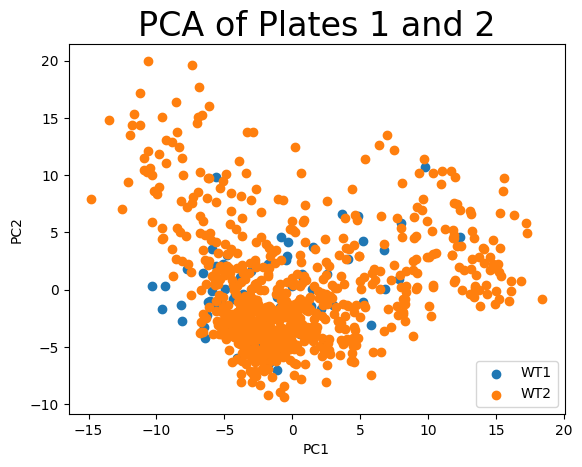

In [11]:
save_args = {"fname": out_path / "pca_wt_plates_1_2"}
au.plot_pca(
    feats=plateswt.drop("labels", axis=1),
    labels=plateswt["labels"],
    save_args=save_args,
    title="PCA of Plates 1 and 2",
)

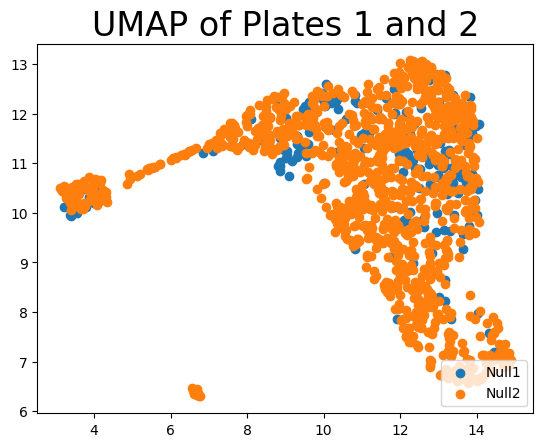

In [12]:
save_args = {"fname": out_path / "umap_null_plates_1_2"}
au.plot_umap(
    feats=platesnull.drop("labels", axis=1),
    labels=platesnull["labels"],
    save_args=save_args,
    title="UMAP of Plates 1 and 2",
)

Explained variance in PC1 and PC2 = 0.2253829533835487


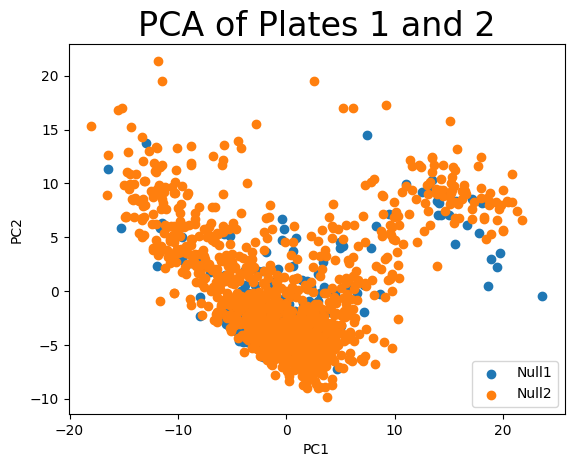

In [13]:
save_args = {"fname": out_path / "pca_null_plates_1_2"}
au.plot_pca(
    feats=platesnull.drop("labels", axis=1),
    labels=platesnull["labels"],
    save_args=save_args,
    title="PCA of Plates 1 and 2",
)